In [28]:
import os

import tensorflow as tf
from tensorflow import keras
from keras import layers,models
from keras.applications import VGG16
from matplotlib import pyplot as plt
from keras import backend as K
from matplotlib import pyplot as plt
import numpy as np

In [29]:
def vgg16_feature_extractor(input_shape):
    # Create VGG16 base model
    base_model = VGG16(include_top=False, input_shape=input_shape,weights='imagenet')

    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Get the output of the base model
    output = base_model.output

    # Flatten the output feature vectors
    output = layers.GlobalAveragePooling2D()(output)

    # Create the model
    model = models.Model(inputs=base_model.input, outputs=output)

    return model


def build_siamese_vgg16(input_shape):
    # Define the input layer for the first image
    input_a = layers.Input(shape=input_shape, name='input_a')
    # Define the input layer for the second image
    input_b = layers.Input(shape=input_shape, name='input_b')

    # data_augmentation = tf.keras.Sequential([
    #   layers.RandomFlip("horizontal_and_vertical"),
    #   layers.RandomRotation(0.2),
    # ], name = "data_augmentation")
    # augmented_input_a = data_augmentation(input_a)
    # augmented_input_b = data_augmentation(input_b)
    # Define the VGG16 model (excluding the top layers)
    base_model = vgg16_feature_extractor(input_shape)


    # Get the output feature vectors from the base model for both inputs
    output_a = base_model(input_a)
    output_b = base_model(input_b)

    concatenated_features = layers.Concatenate()([output_a, output_b])

    # Distance calculation
    distance = layers.Lambda(lambda x: K.abs(x[0] - x[1]), name='distance')([output_a, output_b])

    # Output layer
    output = layers.Dense(1, activation='sigmoid', name='output')(distance)

    # Create the Siamese model
    siamese_model = models.Model(inputs=[input_a, input_b], outputs=output, name='siamese_vgg16')

    return siamese_model

# Set the input shape for the VGG16 model
input_shape = (224, 224, 3)

# Build the Siamese VGG16 twins model

model = build_siamese_vgg16(input_shape)

# Compile the model with contrastive loss


# Display the model summary
model.summary()

Model: "siamese_vgg16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_a (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_b (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_1 (Functional)           (None, 512)          14714688    ['input_a[0][0]',                
                                                                  'input_b[0][0]']    

In [30]:
model.compile(optimizer =tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
                        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                        metrics = ["accuracy"])

In [31]:
path=os.path.join("mejan","93model.h5")
model.load_weights(path)

In [32]:
def load_and_preprocess_image(image_path):

    image = tf.io.read_file(image_path)
    image = tf.image.decode_bmp(image, channels=0)
    # image=tf.image.grayscale_to_rgb(image)

    image = tf.image.resize(image, size = (224,224))
    return image

In [113]:
img1=os.path.join("Images","h1.bmp")
img2=os.path.join("Images","h2.bmp")
img3=os.path.join("Images","e2.bmp")
img4=os.path.join("Images","d2.bmp")
img5=os.path.join("Images","d1.bmp")
img6=os.path.join("Images","i1.bmp")

In [114]:
img1=load_and_preprocess_image(img1)
img2=load_and_preprocess_image(img2)
img3=load_and_preprocess_image(img3)
img4=load_and_preprocess_image(img4)
img5=load_and_preprocess_image(img5)
img6=load_and_preprocess_image(img6)

img1.shape,img2.shape,img3.shape,img4.shape,img5.shape,img6.shape

(TensorShape([224, 224, 3]),
 TensorShape([224, 224, 3]),
 TensorShape([224, 224, 3]),
 TensorShape([224, 224, 3]),
 TensorShape([224, 224, 3]),
 TensorShape([224, 224, 3]))

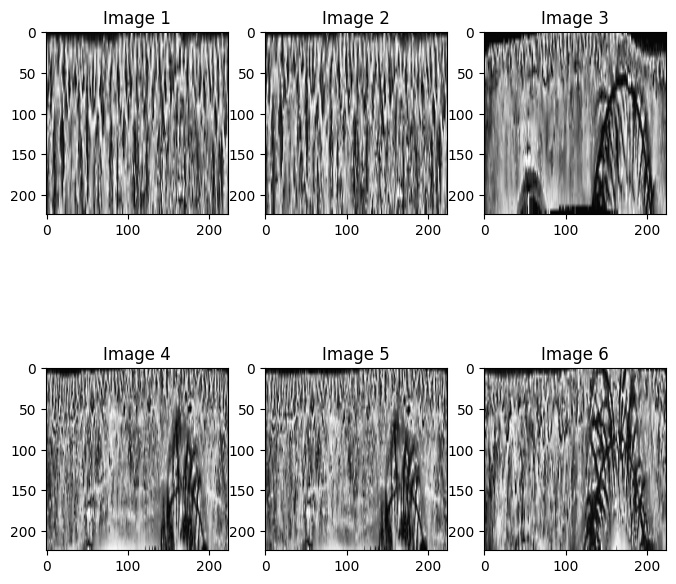

In [115]:
fig, axs = plt.subplots(2,3, figsize=(8, 8))

# Plot data on each subplot
axs[0, 0].imshow(tf.cast(img1, dtype=tf.int32))
axs[0, 0].set_title('Image 1')

axs[0, 1].imshow(tf.cast(img2, dtype=tf.int32))
axs[0, 1].set_title('Image 2')

axs[0, 2].imshow(tf.cast(img3, dtype=tf.int32))
axs[0, 2].set_title('Image 3')

axs[1, 0].imshow(tf.cast(img4, dtype=tf.int32))
axs[1, 0].set_title('Image 4')

axs[1, 1].imshow(tf.cast(img5, dtype=tf.int32))
axs[1, 1].set_title('Image 5')

axs[1, 2].imshow(tf.cast(img6, dtype=tf.int32))
axs[1, 2].set_title('Image 6')

plt.show()

In [116]:
# Assuming img1, img2, ..., img6 are your image tensors

# Add an extra dimension at the beginning for each image
img1 = tf.expand_dims(img1, axis=0)
img2 = tf.expand_dims(img2, axis=0)
img3 = tf.expand_dims(img3, axis=0)
img4 = tf.expand_dims(img4, axis=0)
img5 = tf.expand_dims(img5, axis=0)
img6 = tf.expand_dims(img6, axis=0)

# Print the shape of each image tensor after adding the extra dimension
print(img1.shape)  # Output: (1, 244, 244, 3)
print(img2.shape)  # Output: (1, 244, 244, 3)
print(img3.shape)  # Output: (1, 244, 244, 3)
print(img4.shape)  # Output: (1, 244, 244, 3)
print(img5.shape)  # Output: (1, 244, 244, 3)
print(img6.shape)  # Output: (1, 244, 244, 3)


(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [117]:
model.predict([img1,img2])

1/1 [==============================] - 0s 57ms/step


array([[0.9746703]], dtype=float32)

In [118]:
model.predict([img1,img3])

1/1 [==============================] - 0s 25ms/step


array([[0.00601037]], dtype=float32)

In [119]:
model.predict([img2,img3])

1/1 [==============================] - 0s 25ms/step


array([[0.0012256]], dtype=float32)

In [120]:
model.predict([img3,img3])

1/1 [==============================] - 0s 23ms/step


array([[0.9482558]], dtype=float32)

In [122]:
predictions = []
# img1=os.path.join("Images","h1.bmp")
# img2=os.path.join("Images","i1.bmp")
# img3=os.path.join("Images","e2.bmp")
# img4=os.path.join("Images","d2.bmp")
# img5=os.path.join("Images","d1.bmp")
# img6=os.path.join("Images","h2.bmp")
# Assuming model is your TensorFlow model
for i in range(6):
    for j in range(i+1, 6):
        img1_name = f'img{i+1}'
        img2_name = f'img{j+1}'
        img1_data = eval(img1_name)
        img2_data = eval(img2_name)
        
        # Predict for the pair of images (img_i, img_j)
        prediction = model.predict([img1_data, img2_data])
        predictions.append((img1_name, img2_name, prediction))

# Now predictions list contains tuples of image names and predictions for all combinations of images
for img1_name, img2_name, prediction in predictions:
    print(f"Image 1: {img1_name}, Image 2: {img2_name}, Prediction:{prediction} : {0 if prediction< 0.9 else 1}")


1/1 [==============================] - 0s 20ms/step
Image 1: img1, Image 2: img2, Prediction:[[0.9746703]] : 1
Image 1: img1, Image 2: img3, Prediction:[[0.00601037]] : 0
Image 1: img1, Image 2: img4, Prediction:[[0.8033206]] : 0
Image 1: img1, Image 2: img5, Prediction:[[0.88147426]] : 0
Image 1: img1, Image 2: img6, Prediction:[[0.6417345]] : 0
Image 1: img2, Image 2: img3, Prediction:[[0.0012256]] : 0
Image 1: img2, Image 2: img4, Prediction:[[0.85258085]] : 0
Image 1: img2, Image 2: img5, Prediction:[[0.90804994]] : 1
Image 1: img2, Image 2: img6, Prediction:[[0.44043264]] : 0
Image 1: img3, Image 2: img4, Prediction:[[0.00643128]] : 0
Image 1: img3, Image 2: img5, Prediction:[[0.04380192]] : 0
Image 1: img3, Image 2: img6, Prediction:[[0.02675235]] : 0
Image 1: img4, Image 2: img5, Prediction:[[0.9025355]] : 1
Image 1: img4, Image 2: img6, Prediction:[[0.5604345]] : 0
Image 1: img5, Image 2: img6, Prediction:[[0.853767]] : 0
